In [ ]:
!pip install pyspark

In [ ]:
# Tugas 1
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [ ]:
# Tugas 2
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [ ]:
# Tugas Tambahan 2
# 1
avg_salary_per_dept = spark.sql('''
SELECT d.DeptName, AVG(e.Salary) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

print("Rata-rata Gaji per Departemen:")
avg_salary_per_dept.show()

# Tugas Tambahan 2
# 2
above_avg_salary = spark.sql('''
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Gender
) a ON e.Gender = a.Gender
WHERE e.Salary > a.AvgSalary
''')

print("Karyawan dengan Gaji di Atas Rata-rata:")
above_avg_salary.show()

# Tugas Tambahan 2
# 3
ranking_query = spark.sql('''
SELECT e.Name, e.Salary, e.DeptId,
       ROW_NUMBER() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS Rank
FROM employees e
''')

print("Ranking Karyawan Berdasarkan Gaji dalam Departemen:")
ranking_query.show()

Rata-rata Gaji per Departemen:
+---------+-------------+
| DeptName|AverageSalary|
+---------+-------------+
|       HR|       2850.0|
|Marketing|       4100.0|
+---------+-------------+

Karyawan dengan Gaji di Atas Rata-rata:
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+

Ranking Karyawan Berdasarkan Gaji dalam Departemen:
+-----+------+------+----+
| Name|Salary|DeptId|Rank|
+-----+------+------+----+
|James|  3000|     1|   1|
|  Lee|  2700|     1|   2|
| Anna|  4100|     2|   1|
+-----+------+------+----+



In [ ]:
# Tugas 3
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [ ]:
# Tugas 4
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [ ]:
# Tugas 5
spark.sql('''
SELECT d.DeptName, e.Name, e.Salary,
       RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+-----+------+----+
| DeptName| Name|Salary|Rank|
+---------+-----+------+----+
|       HR|James|  3000|   1|
|       HR|  Lee|  2700|   2|
|Marketing| Anna|  4100|   1|
+---------+-----+------+----+



In [ ]:
# Tugas 6
spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').show()

+---+-------------+
|Age|AverageSalary|
+---+-------------+
| 23|       2700.0|
| 28|       4100.0|
| 34|       3000.0|
+---+-------------+



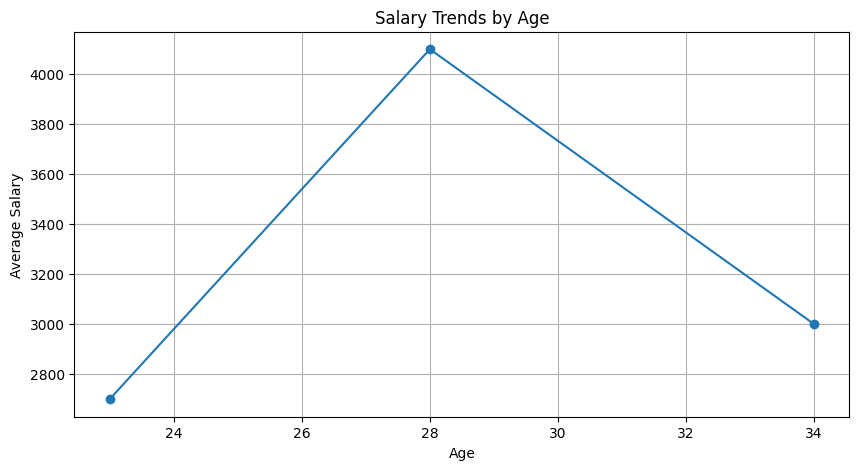

In [ ]:
# Tugas 7
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

+------+-----------+-------------+
|DeptId|TotalSalary|EmployeeCount|
+------+-----------+-------------+
|     1|     106426|           27|
|     2|     112881|           32|
+------+-----------+-------------+



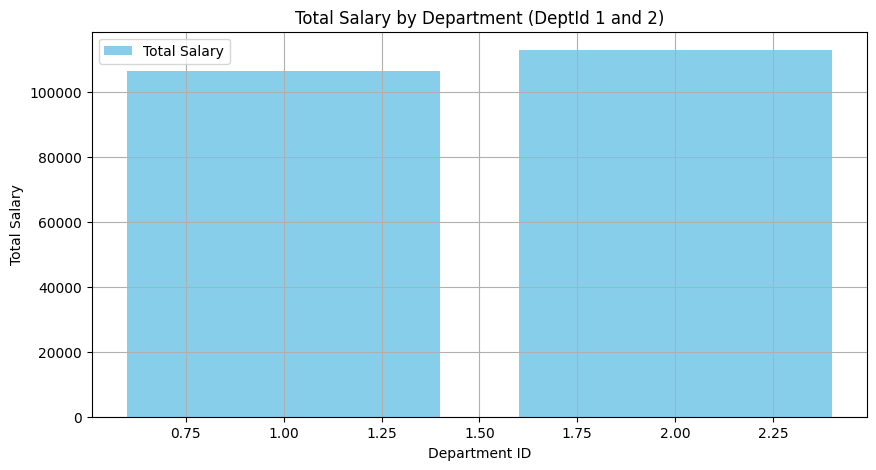

In [ ]:
filtered_salary_summary = spark.sql('''
    SELECT DeptId, SUM(Salary) AS TotalSalary, COUNT(Name) AS EmployeeCount
    FROM employees
    WHERE DeptId IN (1, 2)
    GROUP BY DeptId
''')
filtered_salary_summary.show()

import matplotlib.pyplot as plt

filtered_salary_summary_df = filtered_salary_summary.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(filtered_salary_summary_df['DeptId'], filtered_salary_summary_df['TotalSalary'], color='skyblue', label='Total Salary')
plt.xlabel('Department ID')
plt.ylabel('Total Salary')
plt.title('Total Salary by Department (DeptId 1 and 2)')
plt.legend()
plt.grid(True)
plt.show()



+----+---+------+
|Name|Age|Salary|
+----+---+------+
| Eka| 22|  4334|
|Anna| 22|  3308|
|Hihi| 22|  3302|
|Huhu| 23|  4764|
|Hehe| 23|  4561|
| Lee| 23|  4101|
|Huhu| 24|  4826|
|Haha| 24|  3958|
|Hihi| 24|  3646|
| Eka| 25|  4457|
|Haha| 25|  4386|
|Haha| 26|  4828|
|Hihi| 26|  4083|
|Hihi| 26|  4082|
|Hehe| 27|  4320|
|Hehe| 27|  3863|
|Haha| 27|  3799|
|Anna| 28|  4744|
|Haha| 29|  4312|
| Eka| 29|  4224|
+----+---+------+
only showing top 20 rows



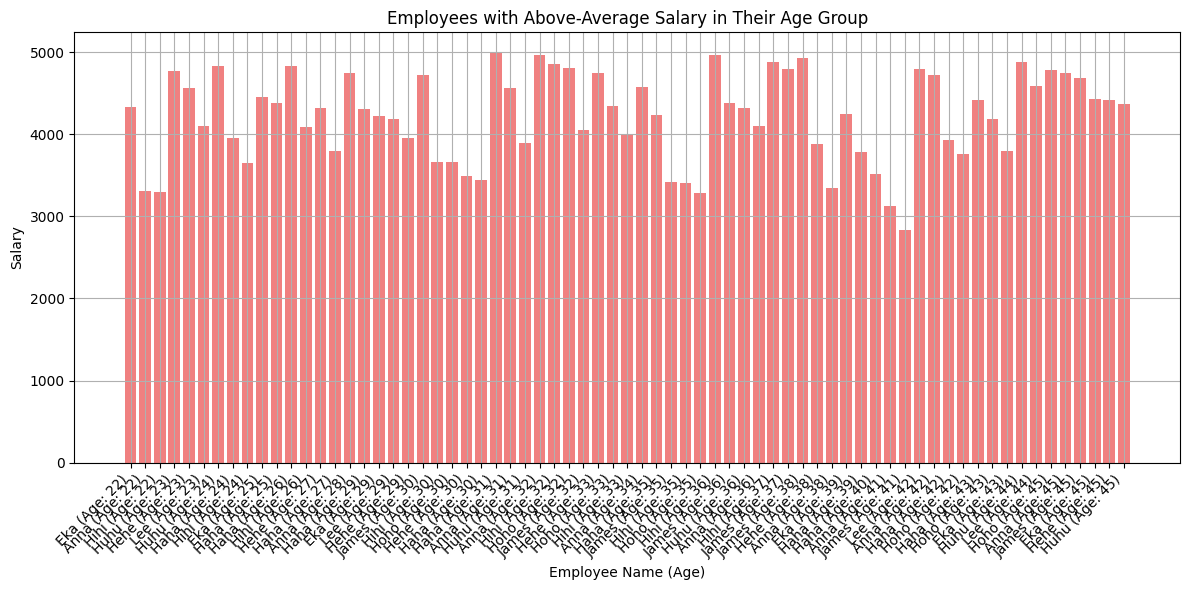

In [ ]:
# Menghitung rata-rata gaji per usia dan memilih karyawan dengan gaji di atas rata-rata per usia
above_avg_salary = spark.sql('''
    WITH avg_salary_per_age AS (
        SELECT Age, AVG(Salary) AS AvgSalary
        FROM employees
        GROUP BY Age
    )
    SELECT e.Name, e.Age, e.Salary
    FROM employees e
    JOIN avg_salary_per_age a ON e.Age = a.Age
    WHERE e.Salary > a.AvgSalary
    ORDER BY e.Age, e.Salary DESC
''')
above_avg_salary.show()

# Visualisasi data dalam bentuk grafik batang
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for visualization
above_avg_salary_df = above_avg_salary.toPandas()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(above_avg_salary_df['Name'] + " (Age: " + above_avg_salary_df['Age'].astype(str) + ")",
        above_avg_salary_df['Salary'], color='lightcoral')
plt.xlabel('Employee Name (Age)')
plt.ylabel('Salary')
plt.title('Employees with Above-Average Salary in Their Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# 3
from pyspark.sql import Row
import random

data = [
    Row(Name=f'Employee_{i}', Age=random.randint(20, 60), Gender=random.choice(['M', 'F']),
        Salary=random.randint(2000, 10000), DeptId=random.choice([1, 2]))
    for i in range(1, 101)
]
large_df = spark.createDataFrame(data)
large_df.createOrReplaceTempView('large_employees')

result = spark.sql('''
    SELECT DeptId,
           SUM(Salary) AS TotalSalary,
           AVG(Salary) AS AvgSalary,
           COUNT(Name) AS EmployeeCount
    FROM large_employees
    GROUP BY DeptId
    ORDER BY DeptId
''')
result.show()


+------+-----------+------------------+-------------+
|DeptId|TotalSalary|         AvgSalary|EmployeeCount|
+------+-----------+------------------+-------------+
|     1|     264895|5406.0204081632655|           49|
|     2|     306704| 6013.803921568628|           51|
+------+-----------+------------------+-------------+



+------+-----------+-----------------+-------------+
|DeptId|TotalSalary|        AvgSalary|EmployeeCount|
+------+-----------+-----------------+-------------+
|     1|     310732|5975.615384615385|           52|
|     2|     278865|        5809.6875|           48|
+------+-----------+-----------------+-------------+



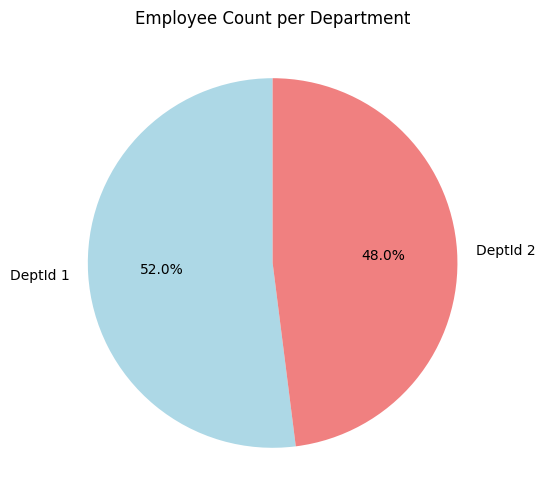

In [ ]:
# Membuat dataset baru dengan 100+ baris, hanya untuk DeptId 1 dan 2
from pyspark.sql import Row
import random

# Generate data hanya dengan DeptId 1 dan 2
data = [
    Row(Name=f'Employee_{i}', Age=random.randint(20, 60), Gender=random.choice(['M', 'F']),
        Salary=random.randint(2000, 10000), DeptId=random.choice([1, 2]))
    for i in range(1, 101)
]
large_df = spark.createDataFrame(data)
large_df.createOrReplaceTempView('large_employees')

# Analisis menggunakan SQL functions
result = spark.sql('''
    SELECT DeptId,
           SUM(Salary) AS TotalSalary,
           AVG(Salary) AS AvgSalary,
           COUNT(Name) AS EmployeeCount
    FROM large_employees
    GROUP BY DeptId
    ORDER BY DeptId
''')
result.show()

# Visualisasi hasil analisis
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for visualization
result_df = result.toPandas()



# Plot pie chart for Employee Count per Department
plt.figure(figsize=(6, 6))
plt.pie(result_df['EmployeeCount'], labels=['DeptId 1', 'DeptId 2'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Employee Count per Department')
plt.show()
